In [18]:
import sys
import os
import ipynbname

def set_project_root(levels_up=2):
    """
    Add the project root directory to sys.path to allow importing modules easily.
    
    This function determines the current file or notebook path and moves up
    'levels_up' directories to set that as the project root.
    
    - When running in a Jupyter notebook, it uses ipynbname to get the notebook path.
    - When running as a script, it uses __file__ to get the script location.
    """
    try:
        # Get the absolute path of the current Jupyter notebook file
        current_path = os.path.abspath(ipynbname.path())
    except Exception:
        # If ipynbname is not available or running as a script
        current_path = os.path.abspath(os.path.dirname(__file__))
    
    project_root = current_path
    for _ in range(levels_up):
        project_root = os.path.dirname(project_root)

    if project_root not in sys.path:
        sys.path.insert(0, project_root)
        print(f"Project root set to ( {levels_up} levels up): {project_root}")


In [19]:
import numpy as np

In [20]:
import pandas as pd

In [21]:
import os
print(os.getcwd())


./12_data/NLP_study/07_sklearn/Text_classification/notebooks


In [22]:
print(os.path.abspath('../../../../12_data/smsspamcollection.tsv'))
print(os.path.exists('../../../../12_data/smsspamcollection.tsv'))

./12_data/12_data/smsspamcollection.tsv
False


In [23]:
df = pd.read_csv('../../../12_data/smsspamcollection.tsv', sep='\t', header=None)



In [24]:
df.head()

,0,1,2,3
0,label,message,length,punct
1,ham,"Go until jurong point, crazy.. Available only ...",111,9
2,ham,Ok lar... Joking wif u oni...,29,6
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
4,ham,U dun say so early hor... U c already then say...,49,6


In [25]:
#alculates and displays the total number of missing (null) values in each column of the DataFrame df

df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [28]:
df.columns = df.iloc[0]

In [29]:
df = df[1:].reset_index(drop=True)

In [30]:
df['length'] = df['length'].astype(int)

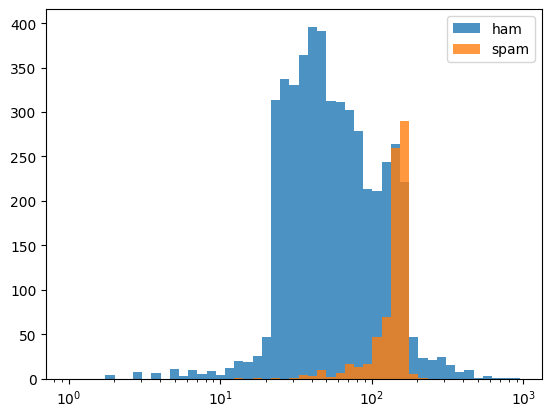

In [31]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [32]:
len(df)

5572

In [33]:
#returns the unique values ​​present in the 'label' column of the dataframe 'DF' in the form of an array. In other words, this code is used to check what different values ​​are in the 'Label' column.
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [34]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [38]:
#train_test_split: A function to split the dataset into training and testing sets.
#LogisticRegression: The class for logistic regression model.
#LabelEncoder: Used to convert categorical string labels into numeric form.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [39]:
#X feature data
X = df[['length', 'punct']]

#y is our label
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print(y_test)

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object


In [41]:
X_train.shape

(3900, 2)

In [42]:
X_test.shape

(1672, 2)

In [43]:
y_test.shape

(1672,)

In [44]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [45]:
#imports the Logistic Regression class from the scikit-learn library.
from sklearn.linear_model import LogisticRegression

In [46]:
#creates an instance of the Logistic Regression model using the 'lbfgs' solver, which is an optimization algorithm effective for handling multi-class problems

lr_model = LogisticRegression(solver='lbfgs')

In [47]:
#trains the logistic regression model lr_model using the training data X_train and the corresponding labels y_train. This step allows the model to learn the relationship between features and the target classes.

lr_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
from sklearn import metrics

In [44]:
#predicts the test data 'x_test' using the `LR_MODEL」 Logistics regression model. The results are stored in the 'predictions' variable and contains the prediction label of the model for the test data.
predictions = lr_model.predict(X_test)

In [45]:
predictions 

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [74]:
#y_test

In [76]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [77]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])


In [78]:
df

,ham,spam
ham,1404,44
spam,219,5


In [46]:
#prints a detailed classification report comparing the true labels y_test with the predicted labels predictions.

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [81]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [47]:
#MultinomialNB is a Naive Bayes classifier suitable for multinomially distributed data, commonly used for text classification tasks such as document classification based on word frequencies. This line imports the MultinomialNB class from scikit-learn.



from sklearn.naive_bayes import MultinomialNB

In [91]:
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [93]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [96]:
from sklearn.svm import SVC

In [97]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

SVC(gamma='auto')

In [98]:
predictions = svc_model.predict(X_test)

In [99]:
print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           